In [73]:
# Import main packages
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
import os
import gc
import json
import re
import matplotlib.pyplot as plt

In [74]:
# Define directories
def find_directory_upwards(dir_name):
    """
    Find the absolute path to a directory with the given name by searching upwards
    from the current notebook's directory.

    Parameters:
    dir_name (str): The name of the directory to find.

    Returns:
    str: The absolute path to the directory if found, otherwise None.
    """
    # Get the current notebook's directory
    current_dir = os.getcwd()
    
    while True:
        # Check if the directory exists in the current directory
        potential_path = os.path.join(current_dir, dir_name)
        if os.path.isdir(potential_path):
            return potential_path
        
        # Move to the parent directory
        parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
        
        # If the current directory is the root directory, stop searching
        if current_dir == parent_dir:
            break
        
        current_dir = parent_dir
    
    # If the directory is not found, return None
    return None

data_dir = find_directory_upwards('data')
data_dir

'c:\\Users\\juanb\\Documents\\HM_Treasury_Hackathon\\data'

In [75]:
# Load df_train
path = os.path.join(data_dir, 'gdp_base.xlsx')
df_train = pd.read_excel(path, sheet_name='df_current_train')
print(df_train.shape)
print(df_train.columns)
print(df_train.isna().sum())
df_train.head(10)

(300, 60)
Index(['date', 'y', 'y_lag', 'cpi', 'm4', 'm4_lend', 'loans', 'net_lend', 'br', 'gscpi', 'GBP/US', 'GBP/EU', 'unemply', 'awe', 'oil_pl', 'us_gdp', 'eu_gdp', 'sr', 'imp', 'exp', 'expp', 'pop', 'visa', 'A_MoM', 'A_QoQ', 'B_MoM', 'BE_MoM', 'BE_QoQ', 'C_MoM', 'C_QoQ', 'D_MoM', 'E_MoM', 'F_MoM', 'F_QoQ', 'G_MoM', 'GT_MoM', 'GT_QoQ', 'GVA_MoM', 'H_MoM', 'I_MoM', 'IOS_MoM', 'IOP_MoM', 'J_MoM', 'K_MoM', 'L_MoM', 'M_MoM', 'O_MoM', 'N_MoM', 'P_MoM', 'P3G_QoQ', 'P3H_QoQ', 'P3N_QoQ', 'P51_QoQ', 'P51S_QoQ', 'P6_QoQ', 'P7_QoQ', 'Q_MoM', 'R_MoM', 'S_MoM', 'T_MoM'], dtype='object')
date          0
y           200
y_lag       201
cpi           1
m4            1
m4_lend       1
loans        14
net_lend    138
br            1
gscpi         1
GBP/US        1
GBP/EU        1
unemply       1
awe          25
oil_pl       25
us_gdp      201
eu_gdp      201
sr          201
imp         201
exp         201
expp        201
pop         201
visa        229
A_MoM         1
A_QoQ       201
B_MoM         1
B

,date,y,y_lag,cpi,m4,m4_lend,loans,net_lend,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,us_gdp,eu_gdp,sr,imp,exp,expp,pop,visa,A_MoM,A_QoQ,B_MoM,BE_MoM,BE_QoQ,C_MoM,C_QoQ,D_MoM,E_MoM,F_MoM,F_QoQ,G_MoM,GT_MoM,GT_QoQ,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,P3G_QoQ,P3H_QoQ,P3N_QoQ,P51_QoQ,P51S_QoQ,P6_QoQ,P7_QoQ,Q_MoM,R_MoM,S_MoM,T_MoM
0,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-02-01,NaN,NaN,70.254,10.9,8.2,NaN,NaN,7.250000,-1.073170,1.635791,1.519002,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,NaN,2.0,0.0,NaN,-0.2,NaN,-3.3,2.9,0.6,NaN,-2.6,-0.4,NaN,-0.27,-2.5,-2.3,-0.4,-0.001,-1.4,10.5,0.2,-2.5,-3.0,-2.1,-1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,-6.8,-1.5,-1.8
2,1998-03-01,0.7,NaN,70.498,10.7,9.3,NaN,NaN,7.250000,-0.435580,1.640735,1.520716,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,-2.7,0.9,NaN,1.0,NaN,3.0,2.7,0.4,NaN,1.7,0.7,NaN,0.74,2.2,-1.4,0.7,0.009,-2.0,2.1,0.9,2.2,2.0,-0.7,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,-3.8,-1.8,-1.4
3,1998-04-01,NaN,0.7,70.700,10.0,8.7,NaN,NaN,7.250000,-0.060024,1.661968,1.552345,6.3,NaN,NaN,3175935.5,2547519.3,7.56537,0.269979,2.521204,-9.851398,58435.0,NaN,1.4,5.2,0.0,0.8,0.9,0.9,1.0,1.6,-0.5,-0.6,2.2,-2.6,-0.5,0.6,-0.20,-0.2,-1.0,-0.5,0.008,1.5,-2.1,0.6,0.3,0.5,-0.2,0.5,1.0,0.8,1.3,0.8,1.6,0.6,2.6,-0.2,-3.6,-1.1,-2.0
4,1998-05-01,NaN,NaN,71.072,10.8,9.2,NaN,NaN,7.250000,-0.118535,1.673364,1.550069,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,0.6,0.5,NaN,0.3,NaN,4.0,-1.1,-1.3,NaN,3.3,1.1,NaN,0.83,0.7,0.1,1.1,0.004,6.0,-2.5,0.4,1.1,-0.5,3.9,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-3.1,1.4,2.7
5,1998-06-01,0.8,NaN,71.449,9.8,8.5,NaN,NaN,7.250000,-0.420967,1.637790,1.485583,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,-0.3,-0.8,NaN,-0.5,NaN,-4.7,-0.6,-0.8,NaN,-4.4,-0.3,NaN,-0.40,2.1,0.3,-0.3,-0.008,3.3,-3.3,-0.2,3.8,-0.7,2.3,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1.6,0.6,-2.2
6,1998-07-01,NaN,0.8,71.343,9.6,8.1,NaN,NaN,7.465909,-0.734049,1.650718,1.512577,6.3,NaN,NaN,3205334.8,2557594.5,7.57913,0.255862,0.508779,-2.466200,58475.0,NaN,1.3,3.7,-0.7,0.2,0.8,0.4,1.0,4.3,-5.1,0.0,-2.1,2.5,0.1,0.8,0.10,-1.9,-0.1,0.1,0.002,1.6,-2.2,0.1,-1.2,-0.2,-1.0,0.5,0.3,1.0,-0.9,-0.1,-0.4,0.1,2.4,-0.1,3.8,-1.5,-2.2
7,1998-08-01,NaN,NaN,70.952,10.4,8.7,NaN,NaN,7.500000,-0.907991,1.643657,1.510601,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,-3.7,-0.3,NaN,0.1,NaN,0.6,-1.7,0.1,NaN,1.6,0.5,NaN,0.29,1.4,-0.2,0.5,-0.003,2.1,-0.4,0.3,-0.8,0.6,-1.2,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,4.6,-0.6,1.4
8,1998-09-01,0.7,NaN,71.238,9.1,8.8,NaN,NaN,7.500000,-0.877323,1.633438,1.493245,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,1.7,0.6,NaN,0.2,NaN,2.8,1.4,0.8,NaN,-1.9,0.1,NaN,0.25,0.3,-0.1,0.1,0.006,3.0,-1.6,0.1,1.6,0.5,1.5,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,3.9,0.7,-0.4
9,1998-10-01,NaN,0.7,71.548,9.4,8.8,NaN,NaN,7.500000,-0.879608,1.682209,1.462261,6.2,NaN,NaN,3245688.0,2573066.2,7.66738,0.239788,-1.160642,-4.880701,58527.0,NaN,-0.2,2.3,0.7,0.3,0.0,0.3,0.5,1.3,-2.4,0.9,0.7,0.4,-0.1,0.5,0.02,0.0,0.2,-0.1,0.003,-0.1,-2.4,0.5,0.3,0.4,-1.6,-0.8,1.0,1.7,-1.2,-0.9,-0.9,-0.3,0.7,0.4,-0.2,2.1,0.6


In [76]:
# Load test df_test
path = os.path.join(data_dir, 'gdp_base.xlsx')
df_test = pd.read_excel(path, sheet_name='df_current_test')
print(df_test.shape)
print(df_test.columns)
print(df_test.isna().sum())
df_test.head(10)

(321, 60)
Index(['date', 'y', 'y_lag', 'cpi', 'm4', 'm4_lend', 'loans', 'net_lend', 'br', 'gscpi', 'GBP/US', 'GBP/EU', 'unemply', 'awe', 'oil_pl', 'us_gdp', 'eu_gdp', 'sr', 'imp', 'exp', 'expp', 'pop', 'visa', 'A_MoM', 'A_QoQ', 'B_MoM', 'BE_MoM', 'BE_QoQ', 'C_MoM', 'C_QoQ', 'D_MoM', 'E_MoM', 'F_MoM', 'F_QoQ', 'G_MoM', 'GT_MoM', 'GT_QoQ', 'GVA_MoM', 'H_MoM', 'I_MoM', 'IOS_MoM', 'IOP_MoM', 'J_MoM', 'K_MoM', 'L_MoM', 'M_MoM', 'O_MoM', 'N_MoM', 'P_MoM', 'P3G_QoQ', 'P3H_QoQ', 'P3N_QoQ', 'P51_QoQ', 'P51S_QoQ', 'P6_QoQ', 'P7_QoQ', 'Q_MoM', 'R_MoM', 'S_MoM', 'T_MoM'], dtype='object')
date          0
y           314
y_lag       215
cpi           1
m4            1
m4_lend       1
loans        14
net_lend    138
br            1
gscpi         1
GBP/US        1
GBP/EU        1
unemply       1
awe          25
oil_pl       25
us_gdp      215
eu_gdp      215
sr          215
imp         215
exp         215
expp        215
pop         215
visa        243
A_MoM         1
A_QoQ       215
B_MoM         1
B

,date,y,y_lag,cpi,m4,m4_lend,loans,net_lend,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,us_gdp,eu_gdp,sr,imp,exp,expp,pop,visa,A_MoM,A_QoQ,B_MoM,BE_MoM,BE_QoQ,C_MoM,C_QoQ,D_MoM,E_MoM,F_MoM,F_QoQ,G_MoM,GT_MoM,GT_QoQ,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,P3G_QoQ,P3H_QoQ,P3N_QoQ,P51_QoQ,P51S_QoQ,P6_QoQ,P7_QoQ,Q_MoM,R_MoM,S_MoM,T_MoM
0,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-02-01,NaN,NaN,70.254,10.9,8.2,NaN,NaN,7.250000,-1.073170,1.635791,1.519002,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,NaN,2.0,0.0,NaN,-0.2,NaN,-3.3,2.9,0.6,NaN,-2.6,-0.4,NaN,-0.27,-2.5,-2.3,-0.4,-0.001,-1.4,10.5,0.2,-2.5,-3.0,-2.1,-1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,-6.8,-1.5,-1.8
2,1998-03-01,NaN,NaN,70.498,10.7,9.3,NaN,NaN,7.250000,-0.435580,1.640735,1.520716,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,-2.7,0.9,NaN,1.0,NaN,3.0,2.7,0.4,NaN,1.7,0.7,NaN,0.74,2.2,-1.4,0.7,0.009,-2.0,2.1,0.9,2.2,2.0,-0.7,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,-3.8,-1.8,-1.4
3,1998-04-01,NaN,0.7,70.700,10.0,8.7,NaN,NaN,7.250000,-0.060024,1.661968,1.552345,6.3,NaN,NaN,3175935.5,2547519.3,7.56537,0.269979,2.521204,-9.851398,58435.0,NaN,1.4,5.2,0.0,0.8,0.9,0.9,1.0,1.6,-0.5,-0.6,2.2,-2.6,-0.5,0.6,-0.20,-0.2,-1.0,-0.5,0.008,1.5,-2.1,0.6,0.3,0.5,-0.2,0.5,1.0,0.8,1.3,0.8,1.6,0.6,2.6,-0.2,-3.6,-1.1,-2.0
4,1998-05-01,NaN,NaN,71.072,10.8,9.2,NaN,NaN,7.250000,-0.118535,1.673364,1.550069,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,0.6,0.5,NaN,0.3,NaN,4.0,-1.1,-1.3,NaN,3.3,1.1,NaN,0.83,0.7,0.1,1.1,0.004,6.0,-2.5,0.4,1.1,-0.5,3.9,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-3.1,1.4,2.7
5,1998-06-01,NaN,NaN,71.449,9.8,8.5,NaN,NaN,7.250000,-0.420967,1.637790,1.485583,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,-0.3,-0.8,NaN,-0.5,NaN,-4.7,-0.6,-0.8,NaN,-4.4,-0.3,NaN,-0.40,2.1,0.3,-0.3,-0.008,3.3,-3.3,-0.2,3.8,-0.7,2.3,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1.6,0.6,-2.2
6,1998-07-01,NaN,0.8,71.343,9.6,8.1,NaN,NaN,7.465909,-0.734049,1.650718,1.512577,6.3,NaN,NaN,3205334.8,2557594.5,7.57913,0.255862,0.508779,-2.466200,58475.0,NaN,1.3,3.7,-0.7,0.2,0.8,0.4,1.0,4.3,-5.1,0.0,-2.1,2.5,0.1,0.8,0.10,-1.9,-0.1,0.1,0.002,1.6,-2.2,0.1,-1.2,-0.2,-1.0,0.5,0.3,1.0,-0.9,-0.1,-0.4,0.1,2.4,-0.1,3.8,-1.5,-2.2
7,1998-08-01,NaN,NaN,70.952,10.4,8.7,NaN,NaN,7.500000,-0.907991,1.643657,1.510601,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,NaN,-3.7,-0.3,NaN,0.1,NaN,0.6,-1.7,0.1,NaN,1.6,0.5,NaN,0.29,1.4,-0.2,0.5,-0.003,2.1,-0.4,0.3,-0.8,0.6,-1.2,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,4.6,-0.6,1.4
8,1998-09-01,NaN,NaN,71.238,9.1,8.8,NaN,NaN,7.500000,-0.877323,1.633438,1.493245,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,1.7,0.6,NaN,0.2,NaN,2.8,1.4,0.8,NaN,-1.9,0.1,NaN,0.25,0.3,-0.1,0.1,0.006,3.0,-1.6,0.1,1.6,0.5,1.5,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,3.9,0.7,-0.4
9,1998-10-01,NaN,0.7,71.548,9.4,8.8,NaN,NaN,7.500000,-0.879608,1.682209,1.462261,6.2,NaN,NaN,3245688.0,2573066.2,7.66738,0.239788,-1.160642,-4.880701,58527.0,NaN,-0.2,2.3,0.7,0.3,0.0,0.3,0.5,1.3,-2.4,0.9,0.7,0.4,-0.1,0.5,0.02,0.0,0.2,-0.1,0.003,-0.1,-2.4,0.5,0.3,0.4,-1.6,-0.8,1.0,1.7,-1.2,-0.9,-0.9,-0.3,0.7,0.4,-0.2,2.1,0.6


In [77]:
# Keep df from '01/03/2023' onwards
df_test = df_test[df_test['date'] >= '01/03/2023']
print(df_test.shape)
df_test.head(10)

(20, 60)


,date,y,y_lag,cpi,m4,m4_lend,loans,net_lend,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,us_gdp,eu_gdp,sr,imp,exp,expp,pop,visa,A_MoM,A_QoQ,B_MoM,BE_MoM,BE_QoQ,C_MoM,C_QoQ,D_MoM,E_MoM,F_MoM,F_QoQ,G_MoM,GT_MoM,GT_QoQ,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,P3G_QoQ,P3H_QoQ,P3N_QoQ,P51_QoQ,P51S_QoQ,P6_QoQ,P7_QoQ,Q_MoM,R_MoM,S_MoM,T_MoM
301,2023-02-01,NaN,NaN,126.447,2.8,1.5,-653.0,-25087.0,3.500000,1.077271,1.222391,1.134855,4.0,637.0,43.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-6.7,-0.4,NaN,0.6,NaN,0.6,0.6,-3.7,NaN,0.2,0.7,NaN,0.26,1.2,0.1,0.7,-0.004,1.3,1.0,0.1,-1.2,-0.1,1.8,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,3.8,2.4,-3.9
302,2023-03-01,0.0,NaN,127.892,1.0,-0.4,600.0,759.0,3.975000,-0.213696,1.208590,1.128940,4.0,641.0,43.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,6.3,0.5,NaN,0.0,NaN,-1.5,-1.4,2.4,NaN,-0.4,0.2,NaN,0.38,0.0,0.3,0.2,0.005,0.1,0.7,0.0,0.4,-0.7,1.6,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,2.1,2.2,-3.1
303,2023-04-01,NaN,0.0,128.870,0.4,-1.1,1415.0,-4362.0,4.076087,-1.139852,1.213496,1.133000,3.9,643.0,41.50,5600858.8,3748109.6,4.063166,1.250834,-27.364061,-24.697516,68100.0,833499.0,0.1,-0.2,-2.4,0.5,0.0,0.4,1.0,3.5,2.4,-0.3,-1.0,-1.5,-0.4,0.3,-0.30,-1.0,-2.7,-0.4,0.005,-1.4,0.1,0.2,-0.5,0.2,-0.6,0.8,-0.7,-0.5,0.8,2.7,5.6,-8.3,-2.8,-0.2,1.2,-1.0,1.3
304,2023-05-01,NaN,NaN,130.429,0.2,-1.0,-317.0,-4879.0,4.250000,-1.283637,1.245025,1.135075,4.0,650.0,42.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-0.2,0.2,NaN,0.9,NaN,-1.9,-2.1,-0.2,NaN,1.3,0.1,NaN,0.13,-0.4,2.7,0.1,0.002,0.5,-0.1,-0.1,-0.7,0.1,0.3,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,0.2,-0.7,-0.6
305,2023-06-01,0.1,NaN,131.308,0.0,-1.4,-144.0,-881.0,4.413043,-1.556671,1.247730,1.148943,4.2,654.0,38.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.7,-1.1,NaN,-0.6,NaN,-5.8,-2.0,-1.0,NaN,-0.6,-0.2,NaN,-0.39,-0.9,-2.6,-0.2,-0.011,0.4,-1.0,0.0,0.2,0.2,-0.6,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.5,-2.0,2.5
306,2023-07-01,NaN,0.1,131.473,0.2,-1.5,64.0,2673.0,4.659091,-1.092485,1.263095,1.165018,4.3,668.0,37.55,5634854.5,3749754.4,4.662244,1.202117,0.114794,-0.721796,68265.0,1148053.0,0.0,0.2,-2.0,2.4,0.7,3.2,1.8,3.2,1.3,3.0,0.7,0.8,0.3,-0.2,0.72,0.8,1.2,0.3,0.024,0.3,-0.9,-0.1,-0.7,0.4,2.1,0.8,1.7,0.6,-3.6,-1.6,1.0,-0.6,0.7,0.5,-2.4,2.2,0.0
307,2023-08-01,NaN,NaN,130.905,-1.1,-1.9,2849.0,9629.0,5.000000,-0.922437,1.288129,1.165067,4.3,663.0,38.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,0.4,-0.8,NaN,-1.1,NaN,0.7,-0.8,-0.8,NaN,-0.3,-0.4,NaN,-0.47,-1.7,-1.0,-0.4,-0.008,-1.9,-0.3,-0.2,0.9,0.2,-0.9,-1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.8,4.2,1.7,0.6
308,2023-09-01,-0.1,NaN,131.346,-0.7,-1.6,4086.0,-11019.0,5.228261,-1.056029,1.269991,1.164313,4.1,664.0,42.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.9,-0.3,NaN,-0.8,NaN,0.2,-1.4,-1.3,NaN,0.4,0.2,NaN,0.00,0.2,-1.5,0.2,-0.003,-0.1,-0.1,0.3,-0.2,0.1,-0.2,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,-5.2,-2.3,0.4
309,2023-10-01,NaN,-0.1,131.997,-3.8,-3.1,453.0,5571.0,5.250000,-0.644611,1.238914,1.160514,4.0,670.0,45.61,5695233.3,3754946.5,5.393169,1.225512,-6.783262,-6.478156,68455.0,1238262.0,0.0,0.1,-3.4,-0.5,0.1,-0.5,0.1,1.3,1.2,0.9,0.2,-1.0,0.0,-0.2,-0.03,0.1,1.1,0.0,-0.005,0.1,-0.4,-0.4,-0.4,0.3,0.2,0.2,0.9,-0.7,1.9,-1.6,-2.3,-1.9,-2.8,1.4,0.0,1.0,-1.8
310,2023-11-01,NaN,NaN,132.004,-3.7,-2.1,-1368.0,15581.0,5.250000,-0.350201,1.216777,1.152341,4.0,664.0,46.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,-1.1,-1.7,NaN,-1.4,NaN,-4.4,0.2,0.0,NaN,0.6,-0.3,NaN,-0.40,0.3,-0.5,-0.3,-0.017,-1.7,-0.1,0.3,-1.1,0.4,0.5,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,-0.8,-1.4,-3.1


In [78]:
# Concate df_train and df_test
df = pd.concat([df_train, df_test])
print(df.shape)
df.head()

(320, 60)


,date,y,y_lag,cpi,m4,m4_lend,loans,net_lend,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,us_gdp,eu_gdp,sr,imp,exp,expp,pop,visa,A_MoM,A_QoQ,B_MoM,BE_MoM,BE_QoQ,C_MoM,C_QoQ,D_MoM,E_MoM,F_MoM,F_QoQ,G_MoM,GT_MoM,GT_QoQ,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,P3G_QoQ,P3H_QoQ,P3N_QoQ,P51_QoQ,P51S_QoQ,P6_QoQ,P7_QoQ,Q_MoM,R_MoM,S_MoM,T_MoM
0,1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-02-01,NaN,NaN,70.254,10.9,8.2,NaN,NaN,7.25,-1.073170,1.635791,1.519002,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,NaN,2.0,0.0,NaN,-0.2,NaN,-3.3,2.9,0.6,NaN,-2.6,-0.4,NaN,-0.27,-2.5,-2.3,-0.4,-0.001,-1.4,10.5,0.2,-2.5,-3.0,-2.1,-1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,-6.8,-1.5,-1.8
2,1998-03-01,0.7,NaN,70.498,10.7,9.3,NaN,NaN,7.25,-0.435580,1.640735,1.520716,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,-2.7,0.9,NaN,1.0,NaN,3.0,2.7,0.4,NaN,1.7,0.7,NaN,0.74,2.2,-1.4,0.7,0.009,-2.0,2.1,0.9,2.2,2.0,-0.7,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,-3.8,-1.8,-1.4
3,1998-04-01,NaN,0.7,70.700,10.0,8.7,NaN,NaN,7.25,-0.060024,1.661968,1.552345,6.3,NaN,NaN,3175935.5,2547519.3,7.56537,0.269979,2.521204,-9.851398,58435.0,NaN,1.4,5.2,0.0,0.8,0.9,0.9,1.0,1.6,-0.5,-0.6,2.2,-2.6,-0.5,0.6,-0.20,-0.2,-1.0,-0.5,0.008,1.5,-2.1,0.6,0.3,0.5,-0.2,0.5,1.0,0.8,1.3,0.8,1.6,0.6,2.6,-0.2,-3.6,-1.1,-2.0
4,1998-05-01,NaN,NaN,71.072,10.8,9.2,NaN,NaN,7.25,-0.118535,1.673364,1.550069,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,0.6,0.5,NaN,0.3,NaN,4.0,-1.1,-1.3,NaN,3.3,1.1,NaN,0.83,0.7,0.1,1.1,0.004,6.0,-2.5,0.4,1.1,-0.5,3.9,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-3.1,1.4,2.7


In [79]:
# Load glossary
path = os.path.join(data_dir, 'gdp_base.xlsx')
glossary = pd.read_excel(path, sheet_name='glossary')

# Remove rows with all missing values
glossary = glossary.dropna(how='all')
glossary = glossary[glossary['Code']!='National accounts:']
# remo
print(glossary.shape)
print(glossary.columns)
print(glossary.isna().sum())



glossary.head(10)

(56, 4)
Index(['Code', 'Name', 'Frequency', 'Measure'], dtype='object')
Code          0
Name          0
Frequency    33
Measure      33
dtype: int64


,Code,Name,Frequency,Measure
0,y,GDP per capita: the endogenous variable to be ...,Quarterly,Per cent
1,m4,Monthly 12 month growth rate of M4 (monetary f...,Monthly,Per cent
2,m4_lend,Monthly 12 month growth rate of M4 lending (m...,Monthly,Per cent
3,loans,Monthly changes of monetary financial institut...,Monthly,£
4,net_lend,Monthly changes of UK resident monetary financ...,Monthly,£
5,cpi,Non-seasonally adjusted CPI,Monthly,Index
6,br,UK Bank of England official Bank rate; average...,Monthly,Per cent
7,unemply,Unemployment rate; averaged monthly,Monthly,Per cent
8,awe,Average Weekly Earnings (AWE) from the ONS,Monthly,Index
9,GBP/US,GBP/US exchange rate; averaged to monthly,Monthly,Exchange rate


## Classify variables

In [80]:
# Columns that are in level
level_cols = ['cpi', 'br', 'unemply', 'awe', 'GBP/US', 'GBP/EU', 'oil_pl',
              'us_gdp', 'eu_gdp', 'sr', 'pop']

# Columns that are in percentage
pct_cols = ['m4', 'm4_lend', 'exp', 'expp']

# Columsn that are in absolute change
change_cols = ['loans', 'net_lend']

# Indexes
index_cols = ['gscpi', 'imp']

# !!! (last one I saw: visa)

## Percentage changes

In [81]:
# Create percentage changes for columns in 'level_cols'
for col in level_cols:
    df[col + '_pct'] = df[col].pct_change()

## Monthly linear interpolation of quarterly GDP per capita growth

## Create lags

In [82]:
df.columns.values

array(['date', 'y', 'y_lag', 'cpi', 'm4', 'm4_lend', 'loans', 'net_lend',
       'br', 'gscpi', 'GBP/US', 'GBP/EU', 'unemply', 'awe', 'oil_pl',
       'us_gdp', 'eu_gdp', 'sr', 'imp', 'exp', 'expp', 'pop', 'visa',
       'A_MoM', 'A_QoQ', 'B_MoM', 'BE_MoM', 'BE_QoQ', 'C_MoM', 'C_QoQ',
       'D_MoM', 'E_MoM', 'F_MoM', 'F_QoQ', 'G_MoM', 'GT_MoM', 'GT_QoQ',
       'GVA_MoM', 'H_MoM', 'I_MoM', 'IOS_MoM', 'IOP_MoM', 'J_MoM',
       'K_MoM', 'L_MoM', 'M_MoM', 'O_MoM', 'N_MoM', 'P_MoM', 'P3G_QoQ',
       'P3H_QoQ', 'P3N_QoQ', 'P51_QoQ', 'P51S_QoQ', 'P6_QoQ', 'P7_QoQ',
       'Q_MoM', 'R_MoM', 'S_MoM', 'T_MoM', 'cpi_pct', 'br_pct',
       'unemply_pct', 'awe_pct', 'GBP/US_pct', 'GBP/EU_pct', 'oil_pl_pct',
       'us_gdp_pct', 'eu_gdp_pct', 'sr_pct', 'pop_pct'], dtype=object)

In [83]:
import pandas as pd

# Define columns to exclude and those to lag
exclude_cols = ['date', 'y', 'y_lag']
rest_cols = [col for col in df.columns if col not in exclude_cols]

# Create a list to store lagged DataFrames
lagged_dfs = [df]  # Start with the original DataFrame

# Generate lagged columns
for i in range(1, 7):  # Lag up to 6 months
    lagged_df = df[rest_cols].shift(i).add_suffix(f'_{i}')
    lagged_dfs.append(lagged_df)

# Concatenate all columns at once to avoid fragmentation
df = pd.concat(lagged_dfs, axis=1)

# Display final column names
df.columns.values

array(['date', 'y', 'y_lag', 'cpi', 'm4', 'm4_lend', 'loans', 'net_lend',
       'br', 'gscpi', 'GBP/US', 'GBP/EU', 'unemply', 'awe', 'oil_pl',
       'us_gdp', 'eu_gdp', 'sr', 'imp', 'exp', 'expp', 'pop', 'visa',
       'A_MoM', 'A_QoQ', 'B_MoM', 'BE_MoM', 'BE_QoQ', 'C_MoM', 'C_QoQ',
       'D_MoM', 'E_MoM', 'F_MoM', 'F_QoQ', 'G_MoM', 'GT_MoM', 'GT_QoQ',
       'GVA_MoM', 'H_MoM', 'I_MoM', 'IOS_MoM', 'IOP_MoM', 'J_MoM',
       'K_MoM', 'L_MoM', 'M_MoM', 'O_MoM', 'N_MoM', 'P_MoM', 'P3G_QoQ',
       'P3H_QoQ', 'P3N_QoQ', 'P51_QoQ', 'P51S_QoQ', 'P6_QoQ', 'P7_QoQ',
       'Q_MoM', 'R_MoM', 'S_MoM', 'T_MoM', 'cpi_pct', 'br_pct',
       'unemply_pct', 'awe_pct', 'GBP/US_pct', 'GBP/EU_pct', 'oil_pl_pct',
       'us_gdp_pct', 'eu_gdp_pct', 'sr_pct', 'pop_pct', 'cpi_1', 'm4_1',
       'm4_lend_1', 'loans_1', 'net_lend_1', 'br_1', 'gscpi_1',
       'GBP/US_1', 'GBP/EU_1', 'unemply_1', 'awe_1', 'oil_pl_1',
       'us_gdp_1', 'eu_gdp_1', 'sr_1', 'imp_1', 'exp_1', 'expp_1',
       'pop_1', 'visa_1

In [85]:
df.tail()

,date,y,y_lag,cpi,m4,m4_lend,loans,net_lend,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,us_gdp,eu_gdp,sr,imp,exp,expp,pop,visa,A_MoM,A_QoQ,B_MoM,BE_MoM,BE_QoQ,C_MoM,C_QoQ,D_MoM,E_MoM,F_MoM,F_QoQ,G_MoM,GT_MoM,GT_QoQ,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,P3G_QoQ,P3H_QoQ,P3N_QoQ,P51_QoQ,P51S_QoQ,P6_QoQ,P7_QoQ,Q_MoM,R_MoM,S_MoM,T_MoM,cpi_pct,br_pct,unemply_pct,awe_pct,GBP/US_pct,GBP/EU_pct,oil_pl_pct,us_gdp_pct,eu_gdp_pct,sr_pct,pop_pct,cpi_1,m4_1,m4_lend_1,loans_1,net_lend_1,br_1,gscpi_1,GBP/US_1,GBP/EU_1,unemply_1,awe_1,oil_pl_1,us_gdp_1,eu_gdp_1,sr_1,imp_1,exp_1,expp_1,pop_1,visa_1,A_MoM_1,A_QoQ_1,B_MoM_1,BE_MoM_1,BE_QoQ_1,C_MoM_1,C_QoQ_1,D_MoM_1,E_MoM_1,F_MoM_1,F_QoQ_1,G_MoM_1,GT_MoM_1,GT_QoQ_1,GVA_MoM_1,H_MoM_1,I_MoM_1,IOS_MoM_1,IOP_MoM_1,J_MoM_1,K_MoM_1,L_MoM_1,M_MoM_1,O_MoM_1,N_MoM_1,P_MoM_1,P3G_QoQ_1,P3H_QoQ_1,P3N_QoQ_1,P51_QoQ_1,P51S_QoQ_1,P6_QoQ_1,P7_QoQ_1,Q_MoM_1,R_MoM_1,S_MoM_1,T_MoM_1,cpi_pct_1,br_pct_1,unemply_pct_1,awe_pct_1,GBP/US_pct_1,GBP/EU_pct_1,oil_pl_pct_1,us_gdp_pct_1,eu_gdp_pct_1,sr_pct_1,pop_pct_1,cpi_2,m4_2,m4_lend_2,loans_2,net_lend_2,br_2,gscpi_2,GBP/US_2,GBP/EU_2,unemply_2,awe_2,oil_pl_2,us_gdp_2,eu_gdp_2,sr_2,imp_2,exp_2,expp_2,pop_2,visa_2,A_MoM_2,A_QoQ_2,B_MoM_2,BE_MoM_2,BE_QoQ_2,C_MoM_2,C_QoQ_2,D_MoM_2,E_MoM_2,F_MoM_2,F_QoQ_2,G_MoM_2,GT_MoM_2,GT_QoQ_2,GVA_MoM_2,H_MoM_2,I_MoM_2,IOS_MoM_2,IOP_MoM_2,J_MoM_2,K_MoM_2,L_MoM_2,M_MoM_2,O_MoM_2,N_MoM_2,P_MoM_2,P3G_QoQ_2,P3H_QoQ_2,P3N_QoQ_2,P51_QoQ_2,P51S_QoQ_2,P6_QoQ_2,P7_QoQ_2,Q_MoM_2,R_MoM_2,S_MoM_2,T_MoM_2,cpi_pct_2,br_pct_2,unemply_pct_2,awe_pct_2,GBP/US_pct_2,GBP/EU_pct_2,oil_pl_pct_2,us_gdp_pct_2,eu_gdp_pct_2,sr_pct_2,pop_pct_2,cpi_3,m4_3,m4_lend_3,loans_3,net_lend_3,br_3,gscpi_3,GBP/US_3,GBP/EU_3,unemply_3,awe_3,oil_pl_3,us_gdp_3,eu_gdp_3,sr_3,imp_3,exp_3,expp_3,pop_3,visa_3,A_MoM_3,A_QoQ_3,B_MoM_3,BE_MoM_3,BE_QoQ_3,C_MoM_3,C_QoQ_3,D_MoM_3,E_MoM_3,F_MoM_3,F_QoQ_3,G_MoM_3,GT_MoM_3,GT_QoQ_3,GVA_MoM_3,H_MoM_3,I_MoM_3,IOS_MoM_3,IOP_MoM_3,J_MoM_3,K_MoM_3,L_MoM_3,M_MoM_3,O_MoM_3,N_MoM_3,P_MoM_3,P3G_QoQ_3,P3H_QoQ_3,P3N_QoQ_3,P51_QoQ_3,P51S_QoQ_3,P6_QoQ_3,P7_QoQ_3,Q_MoM_3,R_MoM_3,S_MoM_3,T_MoM_3,cpi_pct_3,br_pct_3,unemply_pct_3,awe_pct_3,GBP/US_pct_3,GBP/EU_pct_3,oil_pl_pct_3,us_gdp_pct_3,eu_gdp_pct_3,sr_pct_3,pop_pct_3,cpi_4,m4_4,m4_lend_4,loans_4,net_lend_4,br_4,gscpi_4,GBP/US_4,GBP/EU_4,unemply_4,awe_4,oil_pl_4,us_gdp_4,eu_gdp_4,sr_4,imp_4,exp_4,expp_4,pop_4,visa_4,A_MoM_4,A_QoQ_4,B_MoM_4,BE_MoM_4,BE_QoQ_4,C_MoM_4,C_QoQ_4,D_MoM_4,E_MoM_4,F_MoM_4,F_QoQ_4,G_MoM_4,GT_MoM_4,GT_QoQ_4,GVA_MoM_4,H_MoM_4,I_MoM_4,IOS_MoM_4,IOP_MoM_4,J_MoM_4,K_MoM_4,L_MoM_4,M_MoM_4,O_MoM_4,N_MoM_4,P_MoM_4,P3G_QoQ_4,P3H_QoQ_4,P3N_QoQ_4,P51_QoQ_4,P51S_QoQ_4,P6_QoQ_4,P7_QoQ_4,Q_MoM_4,R_MoM_4,S_MoM_4,T_MoM_4,cpi_pct_4,br_pct_4,unemply_pct_4,awe_pct_4,GBP/US_pct_4,GBP/EU_pct_4,oil_pl_pct_4,us_gdp_pct_4,eu_gdp_pct_4,sr_pct_4,pop_pct_4,cpi_5,m4_5,m4_lend_5,loans_5,net_lend_5,br_5,gscpi_5,GBP/US_5,GBP/EU_5,unemply_5,awe_5,oil_pl_5,us_gdp_5,eu_gdp_5,sr_5,imp_5,exp_5,expp_5,pop_5,visa_5,A_MoM_5,A_QoQ_5,B_MoM_5,BE_MoM_5,BE_QoQ_5,C_MoM_5,C_QoQ_5,D_MoM_5,E_MoM_5,F_MoM_5,F_QoQ_5,G_MoM_5,GT_MoM_5,GT_QoQ_5,GVA_MoM_5,H_MoM_5,I_MoM_5,IOS_MoM_5,IOP_MoM_5,J_MoM_5,K_MoM_5,L_MoM_5,M_MoM_5,O_MoM_5,N_MoM_5,P_MoM_5,P3G_QoQ_5,P3H_QoQ_5,P3N_QoQ_5,P51_QoQ_5,P51S_QoQ_5,P6_QoQ_5,P7_QoQ_5,Q_MoM_5,R_MoM_5,S_MoM_5,T_MoM_5,cpi_pct_5,br_pct_5,unemply_pct_5,awe_pct_5,GBP/US_pct_5,GBP/EU_pct_5,oil_pl_pct_5,us_gdp_pct_5,eu_gdp_pct_5,sr_pct_5,pop_pct_5,cpi_6,m4_6,m4_lend_6,loans_6,net_lend_6,br_6,gscpi_6,GBP/US_6,GBP/EU_6,unemply_6,awe_6,oil_pl_6,us_gdp_6,eu_gdp_6,sr_6,imp_6,exp_6,expp_6,pop_6,visa_6,A_MoM_6,A_QoQ_6,B_MoM_6,BE_MoM_6,BE_QoQ_6,C_MoM_6,C_QoQ_6,D_MoM_6,E_MoM_6,F_MoM_6,F_QoQ_6,G_MoM_6,GT_MoM_6,GT_QoQ_6,GVA_MoM_6,H_MoM_6,I_MoM_6,IOS_MoM_6,IOP_MoM_6,J_MoM_6,K_MoM_6,L_MoM_6,M_MoM_6,O_MoM_6,N_MoM_6,P_MoM_6,P3G_QoQ_6,P3H_QoQ_6,P3N_QoQ_6,P51_QoQ_6,P51S_QoQ_6,P6_QoQ_6,P7_QoQ_6,Q_MoM_6,R_MoM_6,S_MoM_6,T_MoM_6,cpi_pct_6,br_pct_6,unemply_pct_6,awe_pct_6,GBP/US_pct_6,GBP/EU_pct_6,o

## Show missing values

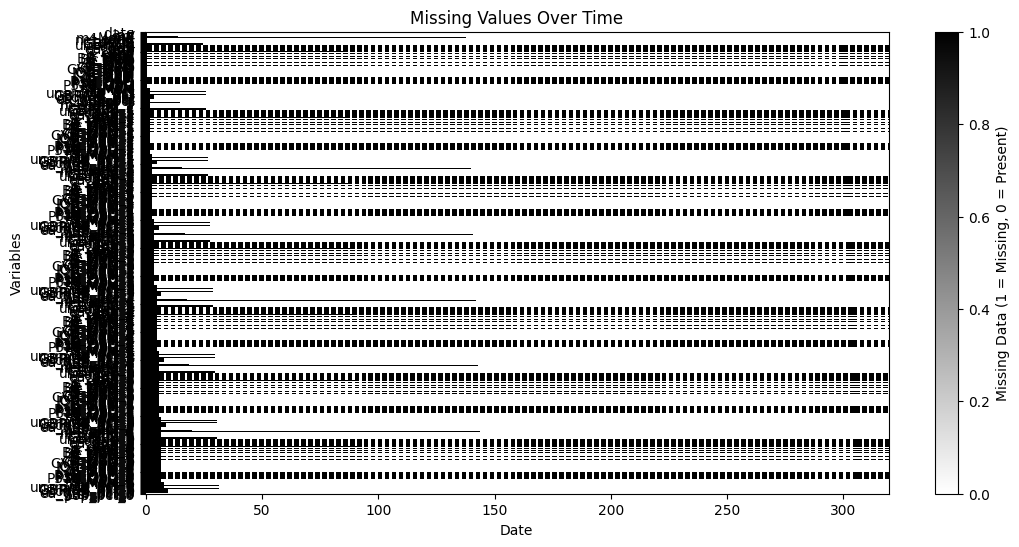

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is the DataFrame with a 'date' column
df_missing = df.set_index('date').isna()

# Create a plot to visualize missing values
plt.figure(figsize=(12, 6))
plt.imshow(df_missing.T, aspect='auto', cmap='gray_r', interpolation='none')

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Variables")
plt.title("Missing Values Over Time")
# plt.xticks(ticks=np.linspace(0, len(df)-1, num=10), labels=df['date'].iloc[::len(df)//10].dt.strftime('%Y-%m'))
plt.yticks(ticks=np.arange(len(df.columns)), labels=df.columns)
plt.colorbar(label="Missing Data (1 = Missing, 0 = Present)")

# Show the plot
plt.show()


## Remove monthly rows

In [87]:
# Only keep rows in dates 3, 6, 9 and 12
df = df[df['date'].dt.month.isin([3, 6, 9, 12])]
print(df.shape)
df.head()

(107, 479)


,date,y,y_lag,cpi,m4,m4_lend,loans,net_lend,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,us_gdp,eu_gdp,sr,imp,exp,expp,pop,visa,A_MoM,A_QoQ,B_MoM,BE_MoM,BE_QoQ,C_MoM,C_QoQ,D_MoM,E_MoM,F_MoM,F_QoQ,G_MoM,GT_MoM,GT_QoQ,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,P3G_QoQ,P3H_QoQ,P3N_QoQ,P51_QoQ,P51S_QoQ,P6_QoQ,P7_QoQ,Q_MoM,R_MoM,S_MoM,T_MoM,cpi_pct,br_pct,unemply_pct,awe_pct,GBP/US_pct,GBP/EU_pct,oil_pl_pct,us_gdp_pct,eu_gdp_pct,sr_pct,pop_pct,cpi_1,m4_1,m4_lend_1,loans_1,net_lend_1,br_1,gscpi_1,GBP/US_1,GBP/EU_1,unemply_1,awe_1,oil_pl_1,us_gdp_1,eu_gdp_1,sr_1,imp_1,exp_1,expp_1,pop_1,visa_1,A_MoM_1,A_QoQ_1,B_MoM_1,BE_MoM_1,BE_QoQ_1,C_MoM_1,C_QoQ_1,D_MoM_1,E_MoM_1,F_MoM_1,F_QoQ_1,G_MoM_1,GT_MoM_1,GT_QoQ_1,GVA_MoM_1,H_MoM_1,I_MoM_1,IOS_MoM_1,IOP_MoM_1,J_MoM_1,K_MoM_1,L_MoM_1,M_MoM_1,O_MoM_1,N_MoM_1,P_MoM_1,P3G_QoQ_1,P3H_QoQ_1,P3N_QoQ_1,P51_QoQ_1,P51S_QoQ_1,P6_QoQ_1,P7_QoQ_1,Q_MoM_1,R_MoM_1,S_MoM_1,T_MoM_1,cpi_pct_1,br_pct_1,unemply_pct_1,awe_pct_1,GBP/US_pct_1,GBP/EU_pct_1,oil_pl_pct_1,us_gdp_pct_1,eu_gdp_pct_1,sr_pct_1,pop_pct_1,cpi_2,m4_2,m4_lend_2,loans_2,net_lend_2,br_2,gscpi_2,GBP/US_2,GBP/EU_2,unemply_2,awe_2,oil_pl_2,us_gdp_2,eu_gdp_2,sr_2,imp_2,exp_2,expp_2,pop_2,visa_2,A_MoM_2,A_QoQ_2,B_MoM_2,BE_MoM_2,BE_QoQ_2,C_MoM_2,C_QoQ_2,D_MoM_2,E_MoM_2,F_MoM_2,F_QoQ_2,G_MoM_2,GT_MoM_2,GT_QoQ_2,GVA_MoM_2,H_MoM_2,I_MoM_2,IOS_MoM_2,IOP_MoM_2,J_MoM_2,K_MoM_2,L_MoM_2,M_MoM_2,O_MoM_2,N_MoM_2,P_MoM_2,P3G_QoQ_2,P3H_QoQ_2,P3N_QoQ_2,P51_QoQ_2,P51S_QoQ_2,P6_QoQ_2,P7_QoQ_2,Q_MoM_2,R_MoM_2,S_MoM_2,T_MoM_2,cpi_pct_2,br_pct_2,unemply_pct_2,awe_pct_2,GBP/US_pct_2,GBP/EU_pct_2,oil_pl_pct_2,us_gdp_pct_2,eu_gdp_pct_2,sr_pct_2,pop_pct_2,cpi_3,m4_3,m4_lend_3,loans_3,net_lend_3,br_3,gscpi_3,GBP/US_3,GBP/EU_3,unemply_3,awe_3,oil_pl_3,us_gdp_3,eu_gdp_3,sr_3,imp_3,exp_3,expp_3,pop_3,visa_3,A_MoM_3,A_QoQ_3,B_MoM_3,BE_MoM_3,BE_QoQ_3,C_MoM_3,C_QoQ_3,D_MoM_3,E_MoM_3,F_MoM_3,F_QoQ_3,G_MoM_3,GT_MoM_3,GT_QoQ_3,GVA_MoM_3,H_MoM_3,I_MoM_3,IOS_MoM_3,IOP_MoM_3,J_MoM_3,K_MoM_3,L_MoM_3,M_MoM_3,O_MoM_3,N_MoM_3,P_MoM_3,P3G_QoQ_3,P3H_QoQ_3,P3N_QoQ_3,P51_QoQ_3,P51S_QoQ_3,P6_QoQ_3,P7_QoQ_3,Q_MoM_3,R_MoM_3,S_MoM_3,T_MoM_3,cpi_pct_3,br_pct_3,unemply_pct_3,awe_pct_3,GBP/US_pct_3,GBP/EU_pct_3,oil_pl_pct_3,us_gdp_pct_3,eu_gdp_pct_3,sr_pct_3,pop_pct_3,cpi_4,m4_4,m4_lend_4,loans_4,net_lend_4,br_4,gscpi_4,GBP/US_4,GBP/EU_4,unemply_4,awe_4,oil_pl_4,us_gdp_4,eu_gdp_4,sr_4,imp_4,exp_4,expp_4,pop_4,visa_4,A_MoM_4,A_QoQ_4,B_MoM_4,BE_MoM_4,BE_QoQ_4,C_MoM_4,C_QoQ_4,D_MoM_4,E_MoM_4,F_MoM_4,F_QoQ_4,G_MoM_4,GT_MoM_4,GT_QoQ_4,GVA_MoM_4,H_MoM_4,I_MoM_4,IOS_MoM_4,IOP_MoM_4,J_MoM_4,K_MoM_4,L_MoM_4,M_MoM_4,O_MoM_4,N_MoM_4,P_MoM_4,P3G_QoQ_4,P3H_QoQ_4,P3N_QoQ_4,P51_QoQ_4,P51S_QoQ_4,P6_QoQ_4,P7_QoQ_4,Q_MoM_4,R_MoM_4,S_MoM_4,T_MoM_4,cpi_pct_4,br_pct_4,unemply_pct_4,awe_pct_4,GBP/US_pct_4,GBP/EU_pct_4,oil_pl_pct_4,us_gdp_pct_4,eu_gdp_pct_4,sr_pct_4,pop_pct_4,cpi_5,m4_5,m4_lend_5,loans_5,net_lend_5,br_5,gscpi_5,GBP/US_5,GBP/EU_5,unemply_5,awe_5,oil_pl_5,us_gdp_5,eu_gdp_5,sr_5,imp_5,exp_5,expp_5,pop_5,visa_5,A_MoM_5,A_QoQ_5,B_MoM_5,BE_MoM_5,BE_QoQ_5,C_MoM_5,C_QoQ_5,D_MoM_5,E_MoM_5,F_MoM_5,F_QoQ_5,G_MoM_5,GT_MoM_5,GT_QoQ_5,GVA_MoM_5,H_MoM_5,I_MoM_5,IOS_MoM_5,IOP_MoM_5,J_MoM_5,K_MoM_5,L_MoM_5,M_MoM_5,O_MoM_5,N_MoM_5,P_MoM_5,P3G_QoQ_5,P3H_QoQ_5,P3N_QoQ_5,P51_QoQ_5,P51S_QoQ_5,P6_QoQ_5,P7_QoQ_5,Q_MoM_5,R_MoM_5,S_MoM_5,T_MoM_5,cpi_pct_5,br_pct_5,unemply_pct_5,awe_pct_5,GBP/US_pct_5,GBP/EU_pct_5,oil_pl_pct_5,us_gdp_pct_5,eu_gdp_pct_5,sr_pct_5,pop_pct_5,cpi_6,m4_6,m4_lend_6,loans_6,net_lend_6,br_6,gscpi_6,GBP/US_6,GBP/EU_6,unemply_6,awe_6,oil_pl_6,us_gdp_6,eu_gdp_6,sr_6,imp_6,exp_6,expp_6,pop_6,visa_6,A_MoM_6,A_QoQ_6,B_MoM_6,BE_MoM_6,BE_QoQ_6,C_MoM_6,C_QoQ_6,D_MoM_6,E_MoM_6,F_MoM_6,F_QoQ_6,G_MoM_6,GT_MoM_6,GT_QoQ_6,GVA_MoM_6,H_MoM_6,I_MoM_6,IOS_MoM_6,IOP_MoM_6,J_MoM_6,K_MoM_6,L_MoM_6,M_MoM_6,O_MoM_6,N_MoM_6,P_MoM_6,P3G_QoQ_6,P3H_QoQ_6,P3N_QoQ_6,P51_QoQ_6,P51S_QoQ_6,P6_QoQ_6,P7_QoQ_6,Q_MoM_6,R_MoM_6,S_MoM_6,T_MoM_6,cpi_pct_6,br_pct_6,unemply_pct_6,awe_pct_6,GBP/US_pct_6,GBP/EU_pct_6,o

## Missing values

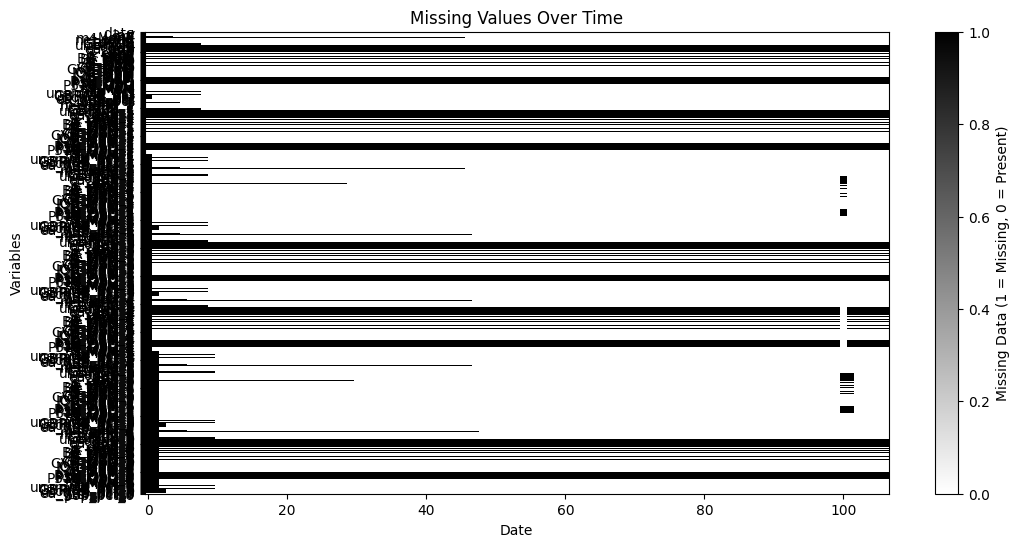

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is the DataFrame with a 'date' column
df_missing = df.set_index('date').isna()

# Create a plot to visualize missing values
plt.figure(figsize=(12, 6))
plt.imshow(df_missing.T, aspect='auto', cmap='gray_r', interpolation='none')

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Variables")
plt.title("Missing Values Over Time")
# plt.xticks(ticks=np.linspace(0, len(df)-1, num=10), labels=df['date'].iloc[::len(df)//10].dt.strftime('%Y-%m'))
plt.yticks(ticks=np.arange(len(df.columns)), labels=df.columns)
plt.colorbar(label="Missing Data (1 = Missing, 0 = Present)")

# Show the plot
plt.show()

In [89]:
df.isna().sum()

date               0
y                  0
y_lag            107
cpi                0
m4                 0
m4_lend            0
loans              4
net_lend          46
br                 0
gscpi              0
GBP/US             0
GBP/EU             0
unemply            0
awe                8
oil_pl             8
us_gdp           107
eu_gdp           107
sr               107
imp              107
exp              107
expp             107
pop              107
visa             107
A_MoM              0
A_QoQ            107
B_MoM              0
BE_MoM             0
BE_QoQ           107
C_MoM              0
C_QoQ            107
D_MoM              0
E_MoM              0
F_MoM              0
F_QoQ            107
G_MoM              0
GT_MoM             0
GT_QoQ           107
GVA_MoM            0
H_MoM              0
I_MoM              0
IOS_MoM            0
IOP_MoM            0
J_MoM              0
K_MoM              0
L_MoM              0
M_MoM              0
O_MoM              0
N_MoM        

In [91]:
# Remove columns with more than 10 missing values
df = df.dropna(axis=1, thresh=len(df) - 10)
print(df.shape)
df.isna().sum()
df.head()

(107, 369)


,date,y,cpi,m4,m4_lend,loans,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,A_MoM,B_MoM,BE_MoM,C_MoM,D_MoM,E_MoM,F_MoM,G_MoM,GT_MoM,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,Q_MoM,R_MoM,S_MoM,T_MoM,cpi_pct,br_pct,unemply_pct,awe_pct,GBP/US_pct,GBP/EU_pct,oil_pl_pct,us_gdp_pct,eu_gdp_pct,sr_pct,pop_pct,cpi_1,m4_1,m4_lend_1,loans_1,br_1,gscpi_1,GBP/US_1,GBP/EU_1,unemply_1,awe_1,oil_pl_1,A_MoM_1,B_MoM_1,BE_MoM_1,C_MoM_1,D_MoM_1,E_MoM_1,F_MoM_1,G_MoM_1,GT_MoM_1,GVA_MoM_1,H_MoM_1,I_MoM_1,IOS_MoM_1,IOP_MoM_1,J_MoM_1,K_MoM_1,L_MoM_1,M_MoM_1,O_MoM_1,N_MoM_1,P_MoM_1,Q_MoM_1,R_MoM_1,S_MoM_1,T_MoM_1,cpi_pct_1,br_pct_1,unemply_pct_1,awe_pct_1,GBP/US_pct_1,GBP/EU_pct_1,oil_pl_pct_1,us_gdp_pct_1,eu_gdp_pct_1,sr_pct_1,pop_pct_1,cpi_2,m4_2,m4_lend_2,loans_2,br_2,gscpi_2,GBP/US_2,GBP/EU_2,unemply_2,awe_2,oil_pl_2,us_gdp_2,eu_gdp_2,sr_2,imp_2,exp_2,expp_2,pop_2,A_MoM_2,A_QoQ_2,B_MoM_2,BE_MoM_2,BE_QoQ_2,C_MoM_2,C_QoQ_2,D_MoM_2,E_MoM_2,F_MoM_2,F_QoQ_2,G_MoM_2,GT_MoM_2,GT_QoQ_2,GVA_MoM_2,H_MoM_2,I_MoM_2,IOS_MoM_2,IOP_MoM_2,J_MoM_2,K_MoM_2,L_MoM_2,M_MoM_2,O_MoM_2,N_MoM_2,P_MoM_2,P3G_QoQ_2,P3H_QoQ_2,P3N_QoQ_2,P51_QoQ_2,P51S_QoQ_2,P6_QoQ_2,P7_QoQ_2,Q_MoM_2,R_MoM_2,S_MoM_2,T_MoM_2,cpi_pct_2,br_pct_2,unemply_pct_2,awe_pct_2,GBP/US_pct_2,GBP/EU_pct_2,oil_pl_pct_2,us_gdp_pct_2,eu_gdp_pct_2,sr_pct_2,pop_pct_2,cpi_3,m4_3,m4_lend_3,loans_3,br_3,gscpi_3,GBP/US_3,GBP/EU_3,unemply_3,awe_3,oil_pl_3,A_MoM_3,B_MoM_3,BE_MoM_3,C_MoM_3,D_MoM_3,E_MoM_3,F_MoM_3,G_MoM_3,GT_MoM_3,GVA_MoM_3,H_MoM_3,I_MoM_3,IOS_MoM_3,IOP_MoM_3,J_MoM_3,K_MoM_3,L_MoM_3,M_MoM_3,O_MoM_3,N_MoM_3,P_MoM_3,Q_MoM_3,R_MoM_3,S_MoM_3,T_MoM_3,cpi_pct_3,br_pct_3,unemply_pct_3,awe_pct_3,GBP/US_pct_3,GBP/EU_pct_3,oil_pl_pct_3,us_gdp_pct_3,eu_gdp_pct_3,sr_pct_3,pop_pct_3,cpi_4,m4_4,m4_lend_4,loans_4,br_4,gscpi_4,GBP/US_4,GBP/EU_4,unemply_4,awe_4,oil_pl_4,A_MoM_4,B_MoM_4,BE_MoM_4,C_MoM_4,D_MoM_4,E_MoM_4,F_MoM_4,G_MoM_4,GT_MoM_4,GVA_MoM_4,H_MoM_4,I_MoM_4,IOS_MoM_4,IOP_MoM_4,J_MoM_4,K_MoM_4,L_MoM_4,M_MoM_4,O_MoM_4,N_MoM_4,P_MoM_4,Q_MoM_4,R_MoM_4,S_MoM_4,T_MoM_4,cpi_pct_4,br_pct_4,unemply_pct_4,awe_pct_4,GBP/US_pct_4,GBP/EU_pct_4,oil_pl_pct_4,us_gdp_pct_4,eu_gdp_pct_4,sr_pct_4,pop_pct_4,cpi_5,m4_5,m4_lend_5,loans_5,br_5,gscpi_5,GBP/US_5,GBP/EU_5,unemply_5,awe_5,oil_pl_5,us_gdp_5,eu_gdp_5,sr_5,imp_5,exp_5,expp_5,pop_5,A_MoM_5,A_QoQ_5,B_MoM_5,BE_MoM_5,BE_QoQ_5,C_MoM_5,C_QoQ_5,D_MoM_5,E_MoM_5,F_MoM_5,F_QoQ_5,G_MoM_5,GT_MoM_5,GT_QoQ_5,GVA_MoM_5,H_MoM_5,I_MoM_5,IOS_MoM_5,IOP_MoM_5,J_MoM_5,K_MoM_5,L_MoM_5,M_MoM_5,O_MoM_5,N_MoM_5,P_MoM_5,P3G_QoQ_5,P3H_QoQ_5,P3N_QoQ_5,P51_QoQ_5,P51S_QoQ_5,P6_QoQ_5,P7_QoQ_5,Q_MoM_5,R_MoM_5,S_MoM_5,T_MoM_5,cpi_pct_5,br_pct_5,unemply_pct_5,awe_pct_5,GBP/US_pct_5,GBP/EU_pct_5,oil_pl_pct_5,us_gdp_pct_5,eu_gdp_pct_5,sr_pct_5,pop_pct_5,cpi_6,m4_6,m4_lend_6,loans_6,br_6,gscpi_6,GBP/US_6,GBP/EU_6,unemply_6,awe_6,oil_pl_6,A_MoM_6,B_MoM_6,BE_MoM_6,C_MoM_6,D_MoM_6,E_MoM_6,F_MoM_6,G_MoM_6,GT_MoM_6,GVA_MoM_6,H_MoM_6,I_MoM_6,IOS_MoM_6,IOP_MoM_6,J_MoM_6,K_MoM_6,L_MoM_6,M_MoM_6,O_MoM_6,N_MoM_6,P_MoM_6,Q_MoM_6,R_MoM_6,S_MoM_6,T_MoM_6,cpi_pct_6,br_pct_6,unemply_pct_6,awe_pct_6,GBP/US_pct_6,GBP/EU_pct_6,oil_pl_pct_6,us_gdp_pct_6,eu_gdp_pct_6,sr_pct_6,pop_pct_6
2,1998-03-01,0.7,70.498,10.7,9.3,NaN,7.250000,-0.435580,1.640735,1.520716,6.4,NaN,NaN,1.8,-2.7,0.9,1.0,3.0,2.7,0.4,1.7,0.7,0.74,2.2,-1.4,0.7,0.009,-2.0,2.1,0.9,2.2,2.0,-0.7,-0.3,-0.1,-3.8,-1.8,-1.4,0.003473,0.000000,0.000000,NaN,0.003022,0.001129,NaN,NaN,NaN,NaN,NaN,70.254,10.9,8.2,NaN,7.250000,-1.073170,1.635791,1.519002,6.4,NaN,NaN,1.7,2.0,0.0,-0.2,-3.3,2.9,0.6,-2.6,-0.4,-0.27,-2.5,-2.3,-0.4,-0.001,-1.4,10.5,0.2,-2.5,-3.0,-2.1,-1.2,0.5,-6.8,-1.5,-1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [92]:
# Remove all the rows with at least one missing value in a column
df = df.dropna()
print(df.shape)
df.head()

(95, 369)


,date,y,cpi,m4,m4_lend,loans,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,A_MoM,B_MoM,BE_MoM,C_MoM,D_MoM,E_MoM,F_MoM,G_MoM,GT_MoM,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,Q_MoM,R_MoM,S_MoM,T_MoM,cpi_pct,br_pct,unemply_pct,awe_pct,GBP/US_pct,GBP/EU_pct,oil_pl_pct,us_gdp_pct,eu_gdp_pct,sr_pct,pop_pct,cpi_1,m4_1,m4_lend_1,loans_1,br_1,gscpi_1,GBP/US_1,GBP/EU_1,unemply_1,awe_1,oil_pl_1,A_MoM_1,B_MoM_1,BE_MoM_1,C_MoM_1,D_MoM_1,E_MoM_1,F_MoM_1,G_MoM_1,GT_MoM_1,GVA_MoM_1,H_MoM_1,I_MoM_1,IOS_MoM_1,IOP_MoM_1,J_MoM_1,K_MoM_1,L_MoM_1,M_MoM_1,O_MoM_1,N_MoM_1,P_MoM_1,Q_MoM_1,R_MoM_1,S_MoM_1,T_MoM_1,cpi_pct_1,br_pct_1,unemply_pct_1,awe_pct_1,GBP/US_pct_1,GBP/EU_pct_1,oil_pl_pct_1,us_gdp_pct_1,eu_gdp_pct_1,sr_pct_1,pop_pct_1,cpi_2,m4_2,m4_lend_2,loans_2,br_2,gscpi_2,GBP/US_2,GBP/EU_2,unemply_2,awe_2,oil_pl_2,us_gdp_2,eu_gdp_2,sr_2,imp_2,exp_2,expp_2,pop_2,A_MoM_2,A_QoQ_2,B_MoM_2,BE_MoM_2,BE_QoQ_2,C_MoM_2,C_QoQ_2,D_MoM_2,E_MoM_2,F_MoM_2,F_QoQ_2,G_MoM_2,GT_MoM_2,GT_QoQ_2,GVA_MoM_2,H_MoM_2,I_MoM_2,IOS_MoM_2,IOP_MoM_2,J_MoM_2,K_MoM_2,L_MoM_2,M_MoM_2,O_MoM_2,N_MoM_2,P_MoM_2,P3G_QoQ_2,P3H_QoQ_2,P3N_QoQ_2,P51_QoQ_2,P51S_QoQ_2,P6_QoQ_2,P7_QoQ_2,Q_MoM_2,R_MoM_2,S_MoM_2,T_MoM_2,cpi_pct_2,br_pct_2,unemply_pct_2,awe_pct_2,GBP/US_pct_2,GBP/EU_pct_2,oil_pl_pct_2,us_gdp_pct_2,eu_gdp_pct_2,sr_pct_2,pop_pct_2,cpi_3,m4_3,m4_lend_3,loans_3,br_3,gscpi_3,GBP/US_3,GBP/EU_3,unemply_3,awe_3,oil_pl_3,A_MoM_3,B_MoM_3,BE_MoM_3,C_MoM_3,D_MoM_3,E_MoM_3,F_MoM_3,G_MoM_3,GT_MoM_3,GVA_MoM_3,H_MoM_3,I_MoM_3,IOS_MoM_3,IOP_MoM_3,J_MoM_3,K_MoM_3,L_MoM_3,M_MoM_3,O_MoM_3,N_MoM_3,P_MoM_3,Q_MoM_3,R_MoM_3,S_MoM_3,T_MoM_3,cpi_pct_3,br_pct_3,unemply_pct_3,awe_pct_3,GBP/US_pct_3,GBP/EU_pct_3,oil_pl_pct_3,us_gdp_pct_3,eu_gdp_pct_3,sr_pct_3,pop_pct_3,cpi_4,m4_4,m4_lend_4,loans_4,br_4,gscpi_4,GBP/US_4,GBP/EU_4,unemply_4,awe_4,oil_pl_4,A_MoM_4,B_MoM_4,BE_MoM_4,C_MoM_4,D_MoM_4,E_MoM_4,F_MoM_4,G_MoM_4,GT_MoM_4,GVA_MoM_4,H_MoM_4,I_MoM_4,IOS_MoM_4,IOP_MoM_4,J_MoM_4,K_MoM_4,L_MoM_4,M_MoM_4,O_MoM_4,N_MoM_4,P_MoM_4,Q_MoM_4,R_MoM_4,S_MoM_4,T_MoM_4,cpi_pct_4,br_pct_4,unemply_pct_4,awe_pct_4,GBP/US_pct_4,GBP/EU_pct_4,oil_pl_pct_4,us_gdp_pct_4,eu_gdp_pct_4,sr_pct_4,pop_pct_4,cpi_5,m4_5,m4_lend_5,loans_5,br_5,gscpi_5,GBP/US_5,GBP/EU_5,unemply_5,awe_5,oil_pl_5,us_gdp_5,eu_gdp_5,sr_5,imp_5,exp_5,expp_5,pop_5,A_MoM_5,A_QoQ_5,B_MoM_5,BE_MoM_5,BE_QoQ_5,C_MoM_5,C_QoQ_5,D_MoM_5,E_MoM_5,F_MoM_5,F_QoQ_5,G_MoM_5,GT_MoM_5,GT_QoQ_5,GVA_MoM_5,H_MoM_5,I_MoM_5,IOS_MoM_5,IOP_MoM_5,J_MoM_5,K_MoM_5,L_MoM_5,M_MoM_5,O_MoM_5,N_MoM_5,P_MoM_5,P3G_QoQ_5,P3H_QoQ_5,P3N_QoQ_5,P51_QoQ_5,P51S_QoQ_5,P6_QoQ_5,P7_QoQ_5,Q_MoM_5,R_MoM_5,S_MoM_5,T_MoM_5,cpi_pct_5,br_pct_5,unemply_pct_5,awe_pct_5,GBP/US_pct_5,GBP/EU_pct_5,oil_pl_pct_5,us_gdp_pct_5,eu_gdp_pct_5,sr_pct_5,pop_pct_5,cpi_6,m4_6,m4_lend_6,loans_6,br_6,gscpi_6,GBP/US_6,GBP/EU_6,unemply_6,awe_6,oil_pl_6,A_MoM_6,B_MoM_6,BE_MoM_6,C_MoM_6,D_MoM_6,E_MoM_6,F_MoM_6,G_MoM_6,GT_MoM_6,GVA_MoM_6,H_MoM_6,I_MoM_6,IOS_MoM_6,IOP_MoM_6,J_MoM_6,K_MoM_6,L_MoM_6,M_MoM_6,O_MoM_6,N_MoM_6,P_MoM_6,Q_MoM_6,R_MoM_6,S_MoM_6,T_MoM_6,cpi_pct_6,br_pct_6,unemply_pct_6,awe_pct_6,GBP/US_pct_6,GBP/EU_pct_6,oil_pl_pct_6,us_gdp_pct_6,eu_gdp_pct_6,sr_pct_6,pop_pct_6
32,2000-09-01,0.2,72.526,8.8,12.9,8176.0,6.000000,0.095456,1.490287,1.646996,5.3,315.0,12.707917,0.4,-1.8,1.1,1.5,1.4,0.3,-0.4,6.1,1.1,0.99,-0.2,0.0,1.1,0.011,4.3,-1.5,-0.2,-1.2,-0.1,-0.7,0.1,0.4,-0.7,-3.7,-3.3,0.000248,0.000000,0.000000,0.006390,-0.012261,0.026065,0.051884,0.0,0.0,0.0,0.0,72.508,6.9,11.8,5854.0,6.000000,0.000772,1.508786,1.605157,5.3,313.0,12.081102,0.6,-3.0,-0.4,-0.3,1.2,0.1,-1.1,-4.2,-0.3,-0.35,3.0,1.0,-0.3,-0.004,-2.0,0.2,0.7,0.3,0.6,2.0,0.2,0.4,1.0,3.8,-3.5,-0.005050,0.000000,0.000000,0.006431,-0.000061,0.010668,-0.016319,0.0,0.0,0.0,0.0,72.876,6.8,11.2,3728.0,6.00,0.049674,1.508877,1.588214,5.3,311.0,12.281527,3532727.0,2741930.2,6.275617,0.283092,14.266823,-1.091619,58886.0,0.6,2.1,4.0,0.4,0.3,0.2,1.2,-4.1,3.0,-1.4,-2.3,-0.3,0.5,1.2,0.40,0.3,-1.5,0.5,0.004,4.7,0.5,-0.1,0.9,-0.2,0.5,0.3,3.3,1.1

In [93]:
df.date

32    2000-09-01
35    2000-12-01
38    2001-03-01
41    2001-06-01
44    2001-09-01
47    2001-12-01
50    2002-03-01
53    2002-06-01
56    2002-09-01
59    2002-12-01
62    2003-03-01
65    2003-06-01
68    2003-09-01
71    2003-12-01
74    2004-03-01
77    2004-06-01
80    2004-09-01
83    2004-12-01
86    2005-03-01
89    2005-06-01
92    2005-09-01
95    2005-12-01
98    2006-03-01
101   2006-06-01
104   2006-09-01
107   2006-12-01
110   2007-03-01
113   2007-06-01
116   2007-09-01
119   2007-12-01
122   2008-03-01
125   2008-06-01
128   2008-09-01
131   2008-12-01
134   2009-03-01
137   2009-06-01
140   2009-09-01
143   2009-12-01
146   2010-03-01
149   2010-06-01
152   2010-09-01
155   2010-12-01
158   2011-03-01
161   2011-06-01
164   2011-09-01
167   2011-12-01
170   2012-03-01
173   2012-06-01
176   2012-09-01
179   2012-12-01
182   2013-03-01
185   2013-06-01
188   2013-09-01
191   2013-12-01
194   2014-03-01
197   2014-06-01
200   2014-09-01
203   2014-12-01
206   2015-03-

## Descriptive statistics

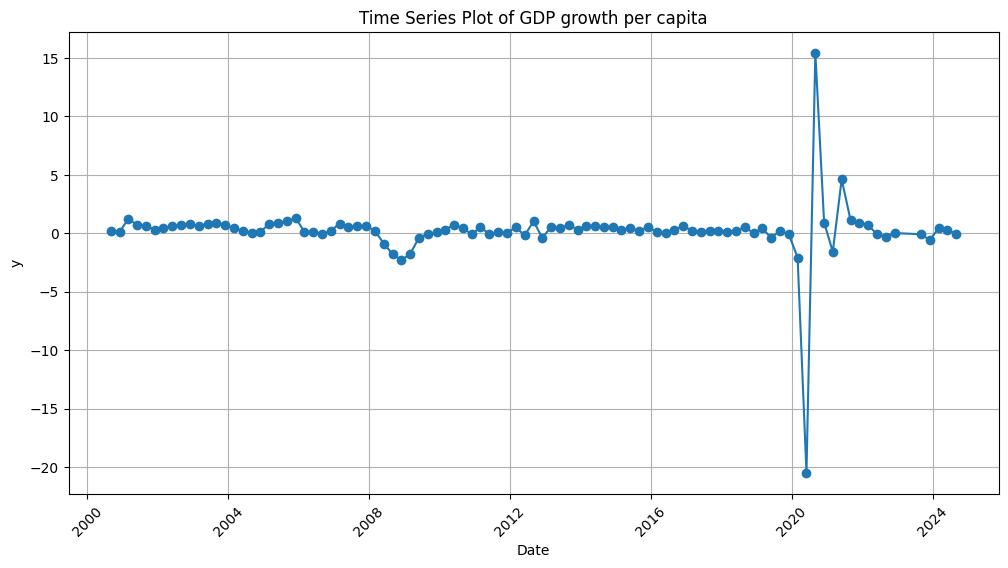

In [94]:
import matplotlib.pyplot as plt

# Assuming df is the user's dfFrame with 'date' and 'y' columns
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['y'], marker='o', linestyle='-')

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("y")
plt.title("Time Series Plot of GDP growth per capita")
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

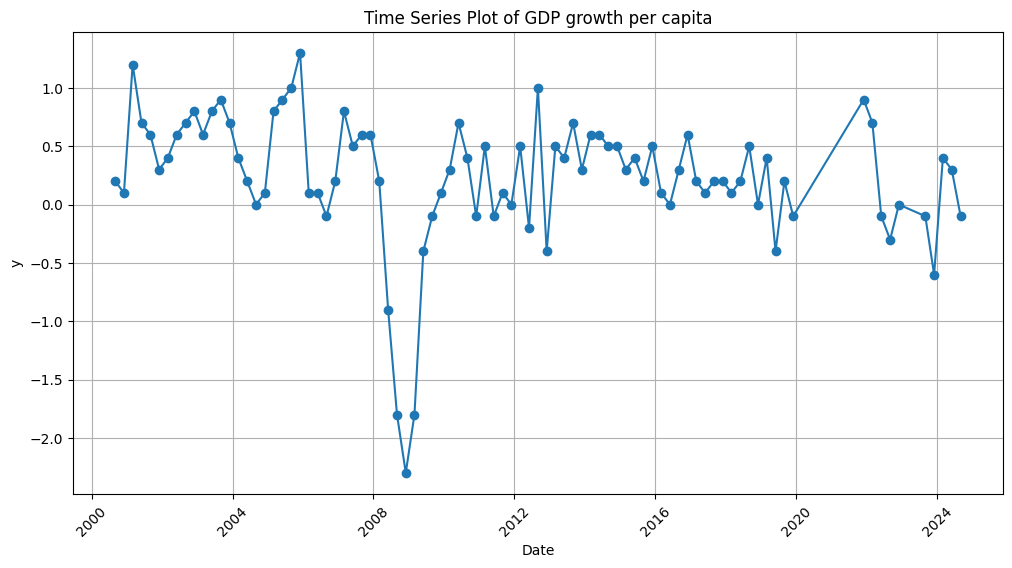

In [95]:
import matplotlib.pyplot as plt

# Drop rows from months from 2020.01 2022.01
aux = df.copy()
mask = ~aux['date'].between('2020-03-01', '2021-09-01')
aux.loc[mask, 'y'] = pd.NA
aux = df[mask]

# Assuming aux is the user's auxFrame with 'date' and 'y' columns
plt.figure(figsize=(12, 6))
plt.plot(aux['date'], aux['y'], marker='o', linestyle='-')

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("y")
plt.title("Time Series Plot of GDP growth per capita")
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [24]:
aux.head()

,date,y,y_lag,cpi,m4,m4_lend,loans,net_lend,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,us_gdp,eu_gdp,sr,imp,exp,expp,pop,visa,A_MoM,A_QoQ,B_MoM,BE_MoM,BE_QoQ,C_MoM,C_QoQ,D_MoM,E_MoM,F_MoM,F_QoQ,G_MoM,GT_MoM,GT_QoQ,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,P3G_QoQ,P3H_QoQ,P3N_QoQ,P51_QoQ,P51S_QoQ,P6_QoQ,P7_QoQ,Q_MoM,R_MoM,S_MoM,T_MoM
266,2020-03-01,-2.1,NaN,108.639,5.1,5.3,2371.0,58897.0,0.75,1.276619,1.295735,1.188170,4.1,546.0,27.514037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4,NaN,0.9,1.8,NaN,2.1,NaN,2.1,-0.5,0.3,NaN,-1.9,-1.0,NaN,-0.49,-3.8,1.0,-1.0,0.018,3.2,0.2,0.2,-1.1,-0.6,-1.2,-6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.2,-1.8,-0.9,-5.9
269,2020-06-01,-20.5,NaN,108.466,11.9,6.8,9962.0,11360.0,0.10,2.505798,1.229395,1.127714,4.1,532.0,15.108580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,1.7,6.7,NaN,9.7,NaN,0.7,0.1,9.8,NaN,15.6,0.7,NaN,2.05,3.6,19.4,0.7,0.067,-1.0,1.1,-0.3,-1.4,-0.4,0.9,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-14.8,4.2,-11.8
272,2020-09-01,15.4,NaN,108.613,12.1,4.4,3099.0,3525.0,0.10,1.480677,1.313524,1.110538,5.0,552.0,21.451120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,-5.1,2.9,NaN,4.6,NaN,-1.9,3.2,3.0,NaN,0.8,3.5,NaN,3.32,1.5,50.5,3.5,0.029,0.2,0.8,0.4,2.0,0.1,2.5,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.5,-8.9,21.0
275,2020-12-01,0.9,NaN,108.891,12.7,4.2,7879.0,1385.0,0.10,0.753726,1.320671,1.116367,5.3,568.0,20.448206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,-3.7,1.5,NaN,2.1,NaN,0.1,0.5,1.1,NaN,-6.7,-2.9,NaN,-2.08,-2.4,-40.6,-2.9,0.015,-1.7,1.3,0.1,-2.7,0.7,-1.2,-4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,-10.4,-1.6,-5.7
278,2021-03-01,-1.6,NaN,109.089,13.6,2.8,7287.0,2734.0,0.10,1.943238,1.387030,1.146650,4.9,567.0,27.239798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,-7.7,0.0,NaN,0.7,NaN,-2.5,0.8,4.7,NaN,4.6,1.4,NaN,1.38,3.4,3.7,1.4,0.000,-1.4,-0.3,0.4,3.2,0.8,0.0,-2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,0.0,1.0,-9.9


In [13]:
aux = df[df['date'].between('2020-03-01', '2021-09-01')]
aux

,date,y,y_lag,cpi,m4,m4_lend,loans,net_lend,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,us_gdp,eu_gdp,sr,imp,exp,expp,pop,visa,A_MoM,A_QoQ,B_MoM,BE_MoM,BE_QoQ,C_MoM,C_QoQ,D_MoM,E_MoM,F_MoM,F_QoQ,G_MoM,GT_MoM,GT_QoQ,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,P3G_QoQ,P3H_QoQ,P3N_QoQ,P51_QoQ,P51S_QoQ,P6_QoQ,P7_QoQ,Q_MoM,R_MoM,S_MoM,T_MoM
266,2020-03-01,-2.1,NaN,108.639,5.1,5.3,2371.0,58897.0,0.75,1.276619,1.295735,1.188170,4.1,546.0,27.514037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4,NaN,0.9,1.8,NaN,2.1,NaN,2.1,-0.5,0.3,NaN,-1.9,-1.0,NaN,-0.49,-3.8,1.0,-1.0,0.018,3.2,0.2,0.2,-1.1,-0.6,-1.2,-6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.2,-1.8,-0.9,-5.9
269,2020-06-01,-20.5,NaN,108.466,11.9,6.8,9962.0,11360.0,0.10,2.505798,1.229395,1.127714,4.1,532.0,15.108580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,1.7,6.7,NaN,9.7,NaN,0.7,0.1,9.8,NaN,15.6,0.7,NaN,2.05,3.6,19.4,0.7,0.067,-1.0,1.1,-0.3,-1.4,-0.4,0.9,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-14.8,4.2,-11.8
272,2020-09-01,15.4,NaN,108.613,12.1,4.4,3099.0,3525.0,0.10,1.480677,1.313524,1.110538,5.0,552.0,21.451120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,-5.1,2.9,NaN,4.6,NaN,-1.9,3.2,3.0,NaN,0.8,3.5,NaN,3.32,1.5,50.5,3.5,0.029,0.2,0.8,0.4,2.0,0.1,2.5,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.5,-8.9,21.0
275,2020-12-01,0.9,NaN,108.891,12.7,4.2,7879.0,1385.0,0.10,0.753726,1.320671,1.116367,5.3,568.0,20.448206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,-3.7,1.5,NaN,2.1,NaN,0.1,0.5,1.1,NaN,-6.7,-2.9,NaN,-2.08,-2.4,-40.6,-2.9,0.015,-1.7,1.3,0.1,-2.7,0.7,-1.2,-4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,-10.4,-1.6,-5.7
278,2021-03-01,-1.6,NaN,109.089,13.6,2.8,7287.0,2734.0,0.10,1.943238,1.387030,1.146650,4.9,567.0,27.239798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,-7.7,0.0,NaN,0.7,NaN,-2.5,0.8,4.7,NaN,4.6,1.4,NaN,1.38,3.4,3.7,1.4,0.000,-1.4,-0.3,0.4,3.2,0.8,0.0,-2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,0.0,1.0,-9.9
281,2021-06-01,4.6,NaN,110.760,7.5,1.1,3011.0,42357.0,0.10,3.030799,1.408362,1.159376,4.7,581.0,30.454116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,NaN,1.5,-0.7,NaN,-1.2,NaN,1.2,0.2,-1.4,NaN,1.0,2.2,NaN,1.55,0.8,40.5,2.2,-0.007,0.8,-0.5,0.0,0.7,0.5,1.4,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,9.7,-15.2,14.5
284,2021-09-01,1.1,NaN,112.085,6.9,1.6,3951.0,5649.0,0.10,3.293328,1.379650,1.172736,4.4,584.0,32.401836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9,NaN,14.9,0.5,NaN,0.3,NaN,-4.0,-0.9,-0.2,NaN,-0.2,1.0,NaN,0.89,2.7,16.3,1.0,0.005,0.5,0.1,0.4,1.3,0.4,0.4,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,3.8,6.6,-15.3


## Feature Selection

!!! Only use past data
Get rid of missing values

In [25]:
df.head(2)

,date,y,y_lag,cpi,m4,m4_lend,loans,net_lend,br,gscpi,GBP/US,GBP/EU,unemply,awe,oil_pl,us_gdp,eu_gdp,sr,imp,exp,expp,pop,visa,A_MoM,A_QoQ,B_MoM,BE_MoM,BE_QoQ,C_MoM,C_QoQ,D_MoM,E_MoM,F_MoM,F_QoQ,G_MoM,GT_MoM,GT_QoQ,GVA_MoM,H_MoM,I_MoM,IOS_MoM,IOP_MoM,J_MoM,K_MoM,L_MoM,M_MoM,O_MoM,N_MoM,P_MoM,P3G_QoQ,P3H_QoQ,P3N_QoQ,P51_QoQ,P51S_QoQ,P6_QoQ,P7_QoQ,Q_MoM,R_MoM,S_MoM,T_MoM
2,1998-03-01,0.7,NaN,70.498,10.7,9.3,NaN,NaN,7.25,-0.435580,1.640735,1.520716,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,-2.7,0.9,NaN,1.0,NaN,3.0,2.7,0.4,NaN,1.7,0.7,NaN,0.74,2.2,-1.4,0.7,0.009,-2.0,2.1,0.9,2.2,2.0,-0.7,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,-3.8,-1.8,-1.4
5,1998-06-01,0.8,NaN,71.449,9.8,8.5,NaN,NaN,7.25,-0.420967,1.637790,1.485583,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,-0.3,-0.8,NaN,-0.5,NaN,-4.7,-0.6,-0.8,NaN,-4.4,-0.3,NaN,-0.40,2.1,0.3,-0.3,-0.008,3.3,-3.3,-0.2,3.8,-0.7,2.3,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1.6,0.6,-2.2


In [15]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [16]:
df.columns.values

array(['date', 'y', 'y_lag', 'cpi', 'm4', 'm4_lend', 'loans', 'net_lend',
       'br', 'gscpi', 'GBP/US', 'GBP/EU', 'unemply', 'awe', 'oil_pl',
       'us_gdp', 'eu_gdp', 'sr', 'imp', 'exp', 'expp', 'pop', 'visa',
       'A_MoM', 'A_QoQ', 'B_MoM', 'BE_MoM', 'BE_QoQ', 'C_MoM', 'C_QoQ',
       'D_MoM', 'E_MoM', 'F_MoM', 'F_QoQ', 'G_MoM', 'GT_MoM', 'GT_QoQ',
       'GVA_MoM', 'H_MoM', 'I_MoM', 'IOS_MoM', 'IOP_MoM', 'J_MoM',
       'K_MoM', 'L_MoM', 'M_MoM', 'O_MoM', 'N_MoM', 'P_MoM', 'P3G_QoQ',
       'P3H_QoQ', 'P3N_QoQ', 'P51_QoQ', 'P51S_QoQ', 'P6_QoQ', 'P7_QoQ',
       'Q_MoM', 'R_MoM', 'S_MoM', 'T_MoM'], dtype=object)

In [17]:
# Define target and features
target = 'y'
features = ['m4', 'm4_lend', 'br', 'unemply', 'GBP/US', 'GBP/EU']
features

['m4', 'm4_lend', 'br', 'unemply', 'GBP/US', 'GBP/EU']

In [18]:
df[features].head(10)

,m4,m4_lend,br,unemply,GBP/US,GBP/EU
2,10.7,9.3,7.250000,6.4,1.640735,1.520716
5,9.8,8.5,7.250000,6.3,1.637790,1.485583
8,9.1,8.8,7.500000,6.2,1.633438,1.493245
11,8.5,8.0,6.821429,6.1,1.661986,1.428986
14,7.6,7.0,5.575000,6.2,1.627565,1.453425
17,7.3,6.9,5.250000,6.0,1.614486,1.519357
20,4.5,7.3,5.000000,5.9,1.606436,1.514768
23,3.6,8.4,5.465909,5.8,1.621350,1.570577
26,3.1,8.9,5.916667,5.8,1.599814,1.626662
29,5.4,12.0,6.000000,5.5,1.508961,1.664996


In [19]:
# Standardize features (LASSO is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
y = df[target].values

In [27]:
# Fit LASSO with cross-validation to select the best alpha
lasso = LassoCV(cv=10, random_state=42).fit(X_scaled, y)

# Extract selected features (non-zero coefficients)
selected_features = np.array(features)[lasso.coef_ != 0]

# Create datFrame with feature importance
lasso_results = pd.DataFrame({
    'feature': features,
    'coefficient': lasso.coef_
}).sort_values(by='coefficient', key=abs, ascending=False)

lasso_results.head()

,feature,coefficient
1,m4_lend,-0.295426
5,GBP/EU,0.288857
4,GBP/US,0.127613
0,m4,-0.000000
2,br,0.000000


In [30]:
selected_features = list(lasso_results['feature'][lasso_results['coefficient']!=0])
selected_features

['m4_lend', 'GBP/EU', 'GBP/US']